# Análisis de la Base de Datos


### **Selección de la base de datos**
---

Se utilizará la base de datos [*Students Performance Dataset - Academic Success Factors in High School Students*](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset), la cual contiene datos acerca de estudiantes de escuela secundaria, sus actividades extracurriculares, las horas de estudio, etc. 

El objetivo de la red a realizar es, a partir de los datos provistos, poder predecir el rendimiento académico de los alumnos (en un principio, si es *bueno* o *malo*), y determinar qué características influyen en dichos resultados.


In [105]:
#Se importa la librería para procesar la base de datos
import pandas as pd 

#Estas funciones modifican cuántos datos se ve cuando se imprime el dataframe 👇 se puede ir tocando
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
#pd.reset_option('all') #Esto lo reinicia                            ----- # Comento esto porque hace saltar una advertencia (FutureWarning... tiene que ver con cosas de la librería que van a retirar próximamente, creo.).

path_file = "students.csv"
dataframe = pd.read_csv(path_file) 
##print(dataframe)

In [106]:
dataframe.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000



### **Tipos de datos**
---
A continuación se detallan las columnas con las que se cuenta, y los tipos de datos que representan:
- ***StudentID***: Número de identificación del estudiante (Categórica)
- ***Age***: Edad de los estudiantes (valores entre 15 y 18 años) (Discreta)
- ***Gender***: Género (0 = masculino, 1 = femenino) (Categórica)
- ***Ethnicity***: Etnia (0 = Caucásico, 1 = Afroamericano, 2 = Asiático, 3 = Otro) (Categórica)
- ***ParentalEducation***: Educación máxima alcanzada por los padres (0 = Ninguna, 1 = Secundario completo, 2 = Universidad, 3 = Bachiller, 4 = Más alto) (Categórica)
- ***StudyTimeWeekly***: Horas semanales de estudio (Continua)
- ***Absences***: Inasistencias durante un año (Discreta)
- ***Tutoring***: Si reciben tutoría especial (0 = No, 1 = Sí) (Categórica)
- ***ParentalSupport***: Nivel de apoyo de los padres (0 = Ninguno, 1 = Bajo, 2 = Moderado, 3 = Alto, 4 = Muy alto) (Categórica)
- ***Extracurricular-Sports-Music-Volunteering***: Si realiza actividades extracurriculares, como deportes, música o solidarias (0 = No, 1 = Sí) (Categórica)
- ***GPA***: Calificación, en una escala de 2 a 4 (Continua)
- ***GradeClass***: Clasificación según GPA { 
    
                                        0: 'A' (GPA >= 3.5)
                                        1: 'B' (3.0 <= GPA < 3.5)
                                        2: 'C' (2.5 <= GPA < 3.0)
                                        3: 'D' (2.0 <= GPA < 2.5)
                                        4: 'F' (GPA < 2.0)(Categórica)}

### **Correlaciones**
---

Para determinar cuáles de las características estudiadas tienen más relación con la calificación de los estudiantes, que es lo que se quiere intentar predecir, se puede calcular el índice de correlación entre las variables, donde valores cercanos a 1 y a -1 indican mayor dependencia positiva o negativa, respectivamente.
En caso de que los valores tiendan a 0, prácticamente no hay ningún tipo de relación entre las variables.


In [107]:
#Evaluación de correlación de variables respecto de la columna "GPA"
print(dataframe.corr()["GPA"])

StudentID           -0.002697
Age                  0.000275
Gender              -0.013360
Ethnicity            0.027760
ParentalEducation   -0.035854
StudyTimeWeekly      0.179275
Absences            -0.919314
Tutoring             0.145119
ParentalSupport      0.190774
Extracurricular      0.094078
Sports               0.057859
Music                0.073318
Volunteering         0.003258
GPA                  1.000000
GradeClass          -0.782835
Name: GPA, dtype: float64


Para ilustrar mejor las correlaciones entre las distintas variables y la GPA, podemos hacer uso de una **matriz de correlaciones**:

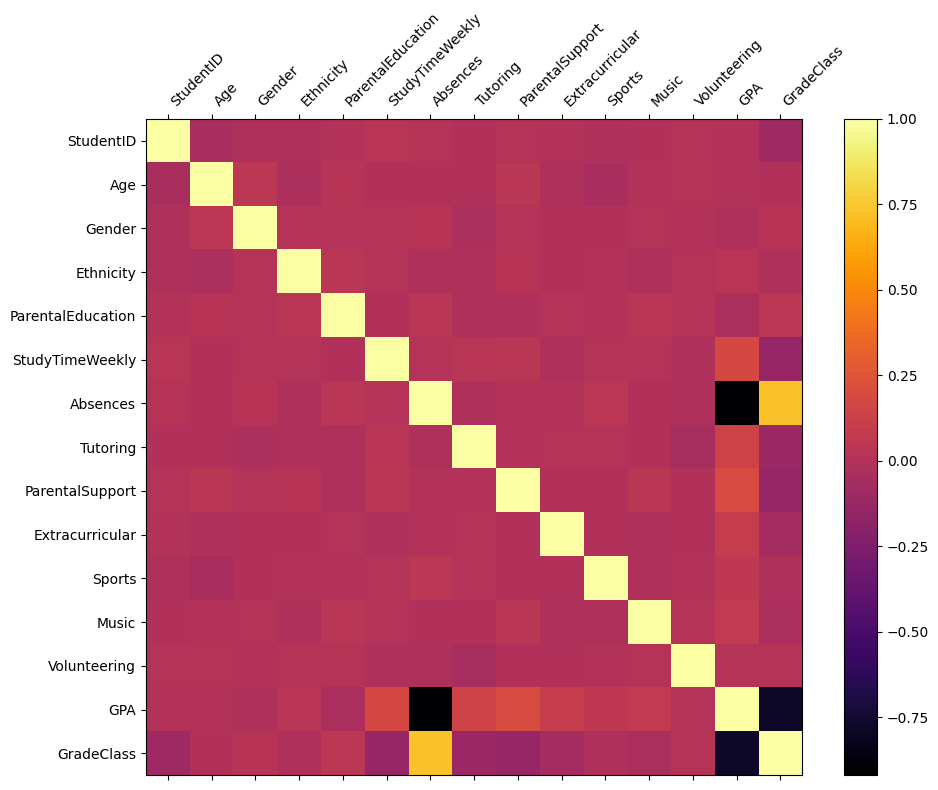

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Suponiendo que ya tienes cargado tu dataframe
dataframe = pd.read_csv("students.csv")

labels = dataframe.columns.to_list()

correlation_matrix = dataframe.corr() # Se calcula la matriz de correlación.

fig, ax = plt.subplots(figsize=(10, 8)) # Acá grafica y de paso ajustamos tamaño.

cax = ax.matshow(correlation_matrix, cmap="inferno")  # Se printea la matriz, cmap es para la paleta de colores. (creo que "inferno" es el que más safa, cmap="Set1" es cursed)

fig.colorbar(cax) # Esta es la barra de colores lateral, ayuda a guiarse.

# Nombres
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

# Etiquetas
ax.set_xticklabels(labels, rotation=45, ha='left')  # Rotamos las etiquetas en el eje X para mejor legibilidad
ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()


Como se puede observar en la matriz de correlaciones, son un par de variables, o columnas, las que más influyen en la GPA.

Tenemos que "StudyTimeWeekly", "Tutoring", "ParentalSupport" tienen cierta relación positiva, mientras que "Absences" una relación extremadamente negativa: a más faltas, peor GPA.

Por otro lado, vemos que hay algunas columnas como "StudentID" (Directamente no suma nada), "Age", "Gender", "Ethnicity" o "Volunteering" que no aportan nada.

Luego, GradeClass es un caso especial, ya que esa variable categoriza el GPA del alumno (como se explicó anteriormente), por ello la descartamos, nosotros somos los que queremos categorizar al alumno en **bueno** o **malo**.

### **Análisis de las variables**
---

Lo primero que podemos observar es que las variables que más se relacionan con GPA son las inasistencias y la clasificación según GPA, ambas de forma negativa, lo cual, a simple vista, es lógico. Pareciera ser que, a más inasistencias, menor será el rendimiento. Además, un valor de clasificación bajo, por la forma en que se creó el dataframe, indica un GPA alto.
Otra observación posible es que tanto el ID del estudiante, como su edad, género o etnia no influyen en las calificaciones de un alumno.

A continuación, una clasificación de las variables que consideraremos útiles (o no) para nuestra red neuronal:

##### Variables que **sí** nos interesan **(Influyen en el GPA)**:
- **Inasistencias**  
   Se puede observar en la correlación que a mayor número de inasistencias, menor es el GPA.

Luego, en menor medida:

- **Horas semanales de estudio**
- **Tutoría**
- **Soporte parental**
- **Deportes**
- **Música**

Estas últimas variables tienen una correlación positiva moderada (aumentan a la par que el GPA), por lo que también aportan información relevante sobre el GPA.
   
##### Variables que **no** nos interesan **(No influyen en el GPA)**:

- **Edad**
- **Género**
- **Etnia**
- **Actividad solidaria** (actividad extracurricular)

Estas variables no presentan una relación directa con el rendimiento académico medido por el GPA.

A continuación, una representación gráfica de las correlaciones anteriormente mencionadas.

Los gráficos muestran la correlación entre las distintas variables que mencionamos y el GPA.

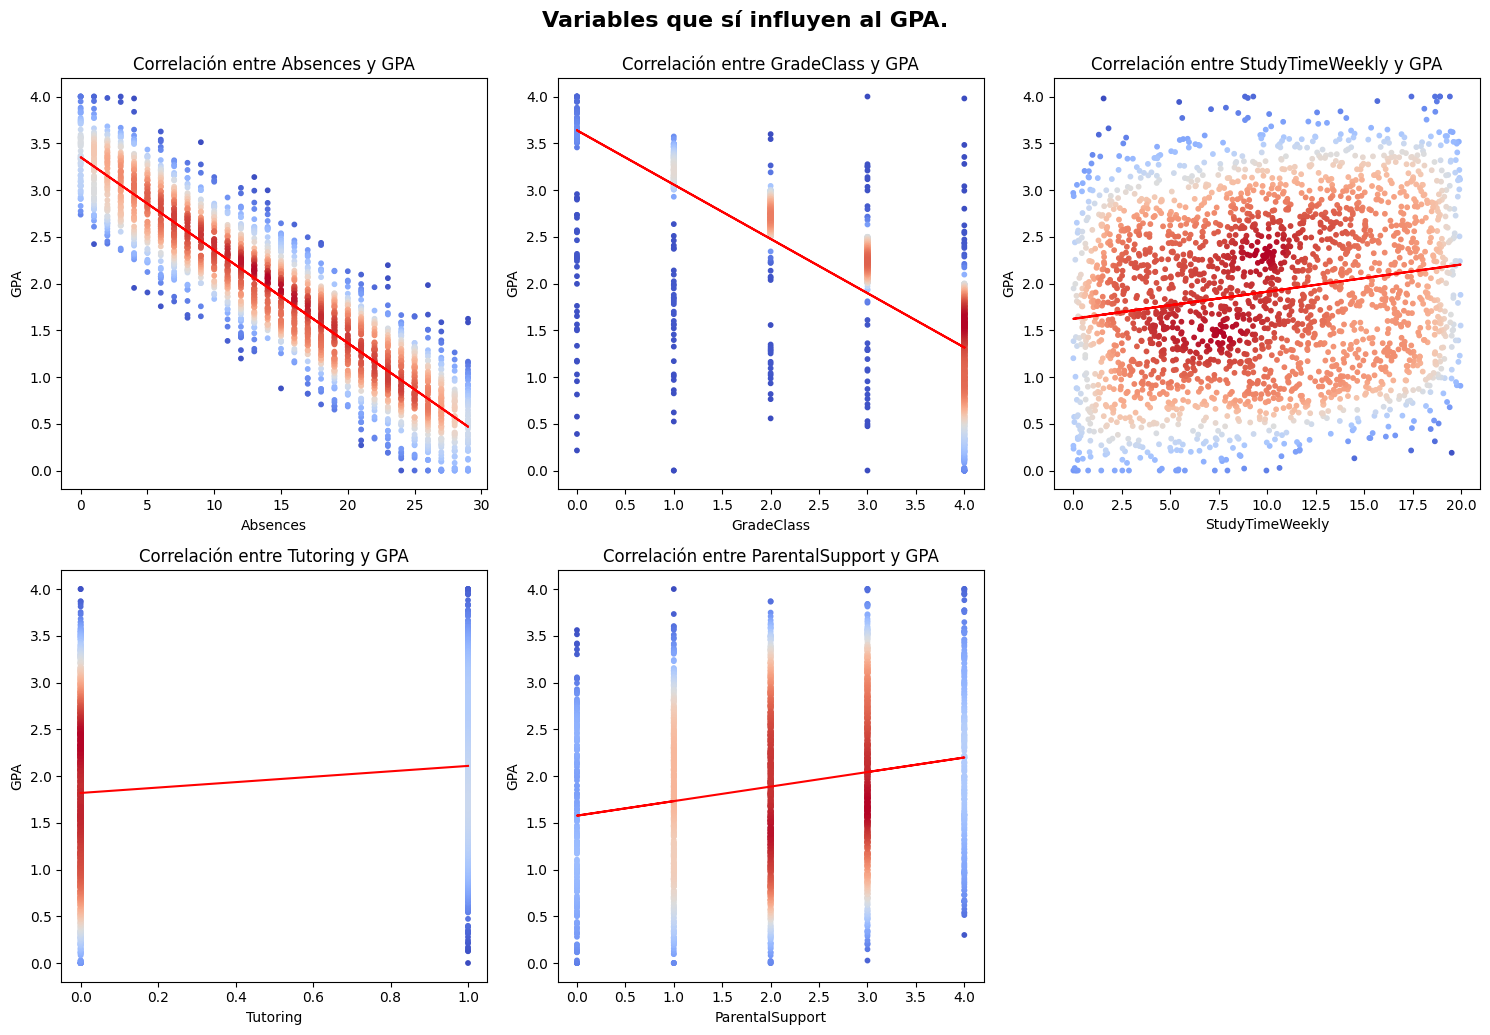

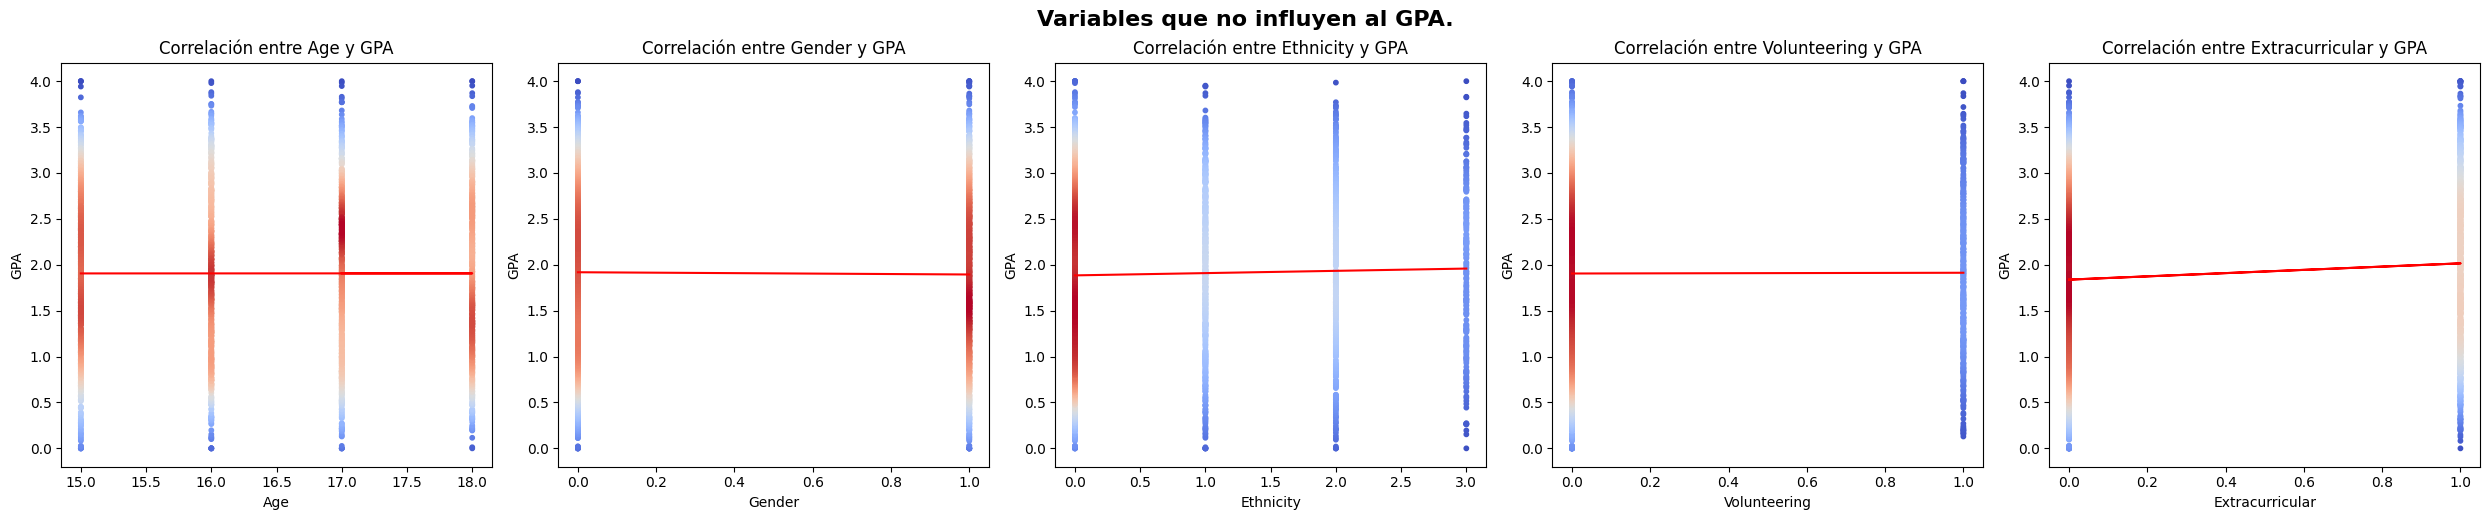

In [109]:
#Se importan las librerías para crear los gráficos
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

dataframe = pd.read_csv("students.csv") # Esto evita tener que ejecutar todo (Run All) para que funcione correctamente la celda de código.

# Lista de variables que vamos a comparar contra el GPA. 
variablesConCorrelacion = ["Absences", "GradeClass", "StudyTimeWeekly", "Tutoring", "ParentalSupport"]
variablesSinCorrelacion = ["Age", "Gender", "Ethnicity", "Volunteering", "Extracurricular"]

# Función para graficar listas de variables contra el GPA, ajustada para el número de variables.
def graficadoraCorrelacionGPA(listaDeVariables, titulo, Large):
    num_variables = len(listaDeVariables)  # Número de variables en la lista

    if (Large):
        num_filas = (num_variables + 2) // 3  # Calcular el número de filas necesarias (3 por fila)
        fig, axs = plt.subplots(num_filas, 3, figsize=(15, 5 * num_filas))
        axs = axs.flatten()
    else:
        fig, axs = plt.subplots(1, num_variables, figsize=(5 * num_variables, 5)) # Creamos una fila que contenga cada gráfico.
        axs = axs.flatten()

    for i, var in enumerate(listaDeVariables):  # Iteramos por cada elemento de la lista.
        x = dataframe[var]
        y = dataframe["GPA"]

        # Calcular la densidad de los puntos
        xy = np.vstack([x, y])
        densidad = gaussian_kde(xy)(xy)

        # Ordenamos por densidad
        idx = densidad.argsort()
        x, y, densidad = x[idx], y[idx], densidad[idx]

        # Graficamos el scatter plot usando la densidad para el color de los puntos
        sc = axs[i].scatter(x, y, c=densidad, cmap='coolwarm', s=10)  

        # Ajustamos una regresión lineal para ver mejor la correlación
        m, b = np.polyfit(x, y, 1)
        axs[i].plot(x, (m * x + b), color="red")  # Línea roja

        axs[i].set_title(f"Correlación entre {var} y GPA")
        axs[i].set_xlabel(var)
        axs[i].set_ylabel("GPA")
    
    # Eliminar gráficos vacíos
    for j in range(i + 1, len(axs)):  
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle(titulo, fontweight='bold', fontsize=16, y=1.03)
    plt.show()

# Ahora llamamos la función para ambas listas
# En la función agregué un parámetro: "Large". Dependiendo si es true o false se genera un gráfico grande o pequeño respectivamente.
graficadoraCorrelacionGPA(variablesConCorrelacion, "Variables que sí influyen al GPA.", True)
graficadoraCorrelacionGPA(variablesSinCorrelacion, "Variables que no influyen al GPA.", False)

Con los gráficos anteriores, queda en evidencia lo planteado.

Si bien podría no haber sido necesario hacerlos, con esto queda confirmado que hay variables que **no nos sirven**, como *age*, *gender*, *volunteering* o *ethnicity*. Y si bien en esta última se aprecia una pequeña pendiente, es despreciable, y más aún cuando no es nuestro objeto de estudio.

### **Factibilidad y Objetivo**
---
Consideramos que esta base de datos es los uficientemente adecuada para poder afrontar un trabajo práctico sobre redes neuronales básicas: vamos a tratar de predecir algo simplemente binario (como practicamos), en este caso: si un alumno es **bueno** o **malo**.

Entonces, primero que nada, tenemos que tener en claro que nuestro objetivo es, dadas ciertas entradas (variables que sí nos interesan), sobre estudiantes de secundaria que estén dentro del rango de nuestra muestra, poder hacer uso de nuestra red neuronal para intentar predecir con un cierto grado de precisión si este es un alumno **bueno** o **malo**. (es decir, si su GPA >= 2.5 o su GPA < 2.5 respectivamente.)

Para ello vamos a tener que tener en cuenta las columnas de las que disponemos, y seleccionar cuáles nos sirven y cuáles no, lo cual ya dejamos en claro anteriormente.

Repasando, vemos que las variables que más influyen en el GPA de un alumno (positivamente) son las asistencias, horas semanales, tutoria, etc. Por otro lado, se puede observar que las que no influyen tienen que ver con la edad, el género, étnia y actividad solidaria.

Además tenemos casos como el de la etnia, donde se puede encontrar una muy leve correlación (y tal vez sea interesante analizarlo brevemente), aunque es prácticamente despreciable y no es precisamente el objetivo de este trabajo.

Y para redondear, la variable o columna "gradeClass" queda descartada por ir directamente de la mano con la variable que queremos predecir, GPA.

En síntesis, consideramos que tenemos una base de datos suficiente para lograr nuestro cometido, es decir, para montar una red neuronal básica y aplicar los conceptos fundamentales que aprendimos a lo largo de la materia (tanto de análisis como de machine learning).

###### Lo anterior es por ahora, si se nos hace fácil podríamos intentar categorizar nosotros (aunque supuestamente necesitaríamos una muestra más grandes y cambiar parte de la red, pero es posible), es decir, predecir a qué categoria (gradeClass) pertenece el alumno.

###### Probablemente falta explayarse más en el objetivo y coso, lo dejo así por ahora. ¯\_(ツ)_/¯

### **Valores Atípicos y Limpieza de Datos**
---

Para ver si tenemos valores atípicos problemáticos, es decir, que nos estén modificando la media de forma exagerada, o que de alguna otra forma distorsionen una posible interpretación de los datos, podemos hacer uso de boxplots para identificarlos.

Finalmente, en caso de ser necesario, deberemos limpiarlos (eliminarlos o modificarlos).

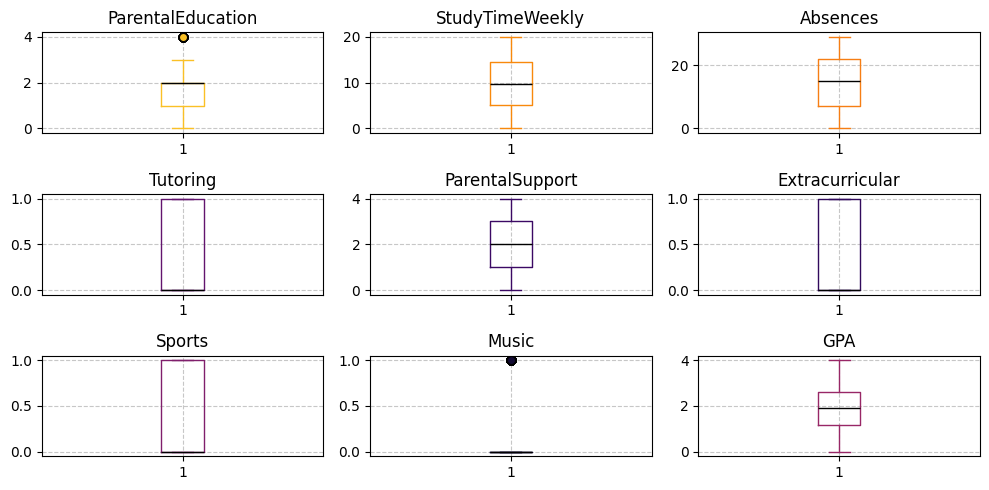

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("students.csv")
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity", "Volunteering", "GradeClass"], inplace = True)

cant_variables = len(dataframe.columns)
fig, axes = plt.subplots(3, 3, figsize=(10, 5)) # Será una grilla 3x3 y con tamaño 15 10.

colores = plt.get_cmap("inferno") # Sacamos el colormap de Inferno, simplemente para la facha.

# Creamos los boxplots.
for ax, col in zip(axes.flatten(), dataframe.columns):
    color = colores(np.random.rand()) # Sacamos un color random de Inferno.
    # A continuación, a la hora de hacer el boxplot todo el choclo de props=dict es para ponerle color a la línea de la mediana, la caja, etc.
    ax.boxplot(dataframe[col],
               boxprops=dict(color=color),                              #Color
               medianprops=dict(color="black"),                         # ''
               whiskerprops=dict(color=color),                          # ''
               capprops=dict(color=color),                              # ''
               flierprops=dict(markerfacecolor=color, marker="o")       # ''
               )
    
    ax.set_title(col) # Ponemos el título.
    ax.grid(True, linestyle="--", alpha=0.7) # Activamos la grilla y lo configuramos.

plt.tight_layout()
plt.show()

In [ ]:
# Por cierto, se podría sacar GPA de acá. Aparte, columnas binarias (categóricas) capaz podríamos sacarlas (extracurricular, tutoring, sports, etc)

Evidentemente, evaluando los boxplots, vemos que tenemos muy pocos valores atípicos.

Buenísimo, entonces no nos tenemos que preocupar por una distorsión enorme en nuestra base de datos que altere nuestra interpretación/análisis del data set.

Ahora, ¿Qué hacemos? En este caso, por tener tan pocos valores atípicos, podríamos reemplazar esos valores atípicos por la **mediana**, de esa forma no estaríamos extrayendo un dato y dejando vacía una celda de alguna columna (problemas), y a la vez es algo válido y "seguro" podríamos decir: si tomaramos la media en lugar de la mediana, si tendríamos un problema, pues podríamos estar reemplazando ese valor por uno ya sesgado.

Ahora que sabemos qué vamos a hacer, ¿Cómo lo hacemos? Si recordamos, a la hora de hablar de valores atípicos estamos hablando de valores que se van "cierto porcentaje" de lo que es la media. Podemos recordar la distribución normal y los cuartiles, y utilizando esa información "recortar los extremos" de la columna en cuestión (claramente esta ordenada en orden creciente o decreciente).

Entonces, en síntesis, analizando la distribución de datos podemos utilizar los cuantiles y extraer valores atípicos. Sin embargo, ¿Qué me marca el límite?

Vamos a considerar que los valores que estén por fuera del siguiente rango de la muestra serán valores atípicos:

- $[ Q1−1.5×IQRQ1−1.5×IQR ]$
- $ [Q3+1.5×IQRQ3+1.5×IQR] $

A continuación la implementación en código y la supresión de dichos valores.


In [111]:
# Lo hago mañana, me estoy durmeindo 😴

### **Transformaciones**
---

En este caso, no es necesario realizar transformaciones a los datos, ya que están convertidos a valores numéricos aptos para el desarrollo de una red neuronal, es decir, que pueden usarse para realizar multiplicaciones matriciales, y están determinados siguiendo una determinada lógica (por ejemplo, un valor más bajo de clase implica un mejor rendimiento, y no es un número asignado arbitrariamente). Sin embargo, sí se puede eliminar en primera instancia las variables que no influyen en el rendimiento académico de los estudiantes, las cuales se detallaron más arriba.

In [112]:
#Se elimina las columnas de ID, Edad, Género y Etnia. # Agrego las otras dos que tampoco aportan algo relevante.
dataframe = pd.read_csv("students.csv") # Si no lo pongo, tira error por más que se haga (Run All).
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity", "Volunteering", "GradeClass"], inplace = True)

print(dataframe)

      ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music       GPA
0                     2        19.833723         7         1                2                0       0      1  2.929196
1                     1        15.408756         0         0                1                0       0      0  3.042915
2                     3         4.210570        26         0                2                0       0      0  0.112602
3                     3        10.028829        14         0                3                1       0      0  2.054218
4                     2         4.672495        17         1                3                0       0      0  1.288061
5                     1         8.191219         0         0                1                1       0      0  3.084184
6                     1        15.601680        10         0                3                0       1      0  2.748237
7                     4        15.424496